![New York City schoolbus](https://github.com/tasyanurkarina/Exploring-NYC-Public-School-Test-Result-Scores/blob/main/schoolbus.jpg?raw=1)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [52]:
from google.colab import files

uploaded = files.upload()

Saving schools.csv to schools (4).csv


In [69]:
import os
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
print(os.listdir())

User uploaded file "schools (4).csv" with length 25412 bytes
['.config', 'schools (4).csv', 'workspace', 'workspace.zip', 'schools.csv', 'schools (2).csv', 'schools (3).csv', 'schools (1).csv', 'sample_data']


In [72]:
# Re-run this cell
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("/content/schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


**Which NYC schools have the best math results?**

- The best math results are at least 80% of the *maximum possible score of 800* for math.
- Save your results in a pandas DataFrame called best_math_schools, including "school_name" and "average_math" columns, sorted by "average_math" in descending order.

In [66]:
total_math = (800 * 80) / 100
print(total_math)

640.0


In [56]:
#Filtering avg_math >= 640 and sorted by avg_math
best_math_schools = schools[schools['average_math'] >= 640][['school_name', 'average_math']].sort_values('average_math', ascending = False)
print(best_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


In [57]:
#Calculation total_SAT
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']
print(schools)

                                           school_name    borough  \
0    New Explorations into Science, Technology and ...  Manhattan   
1                                 Essex Street Academy  Manhattan   
2                         Lower Manhattan Arts Academy  Manhattan   
3      High School for Dual Language and Asian Studies  Manhattan   
4        Henry Street School for International Studies  Manhattan   
..                                                 ...        ...   
370  Queens High School for Information, Research, ...     Queens   
371  Rockaway Park High School for Environmental Su...     Queens   
372                   Channel View School for Research     Queens   
373                    Rockaway Collegiate High School     Queens   
374                                  Scholars' Academy     Queens   

    building_code  average_math  average_reading  average_writing  \
0            M022           657              601              601   
1            M445           395  

**What are the top 10 performing schools based on the combined SAT scores?**

- Save your results as a pandas DataFrame called top_10_schools containing the "school_name" and a new column named "total_SAT", with results ordered by "total_SAT" in descending order ("total_SAT" being the sum of math, reading, and writing scores).

In [58]:
#Sorted by top 10 schools
top_10_schools = schools.sort_values('total_SAT', ascending = False)[['school_name', 'total_SAT']].head(10)
print(top_10_schools)

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


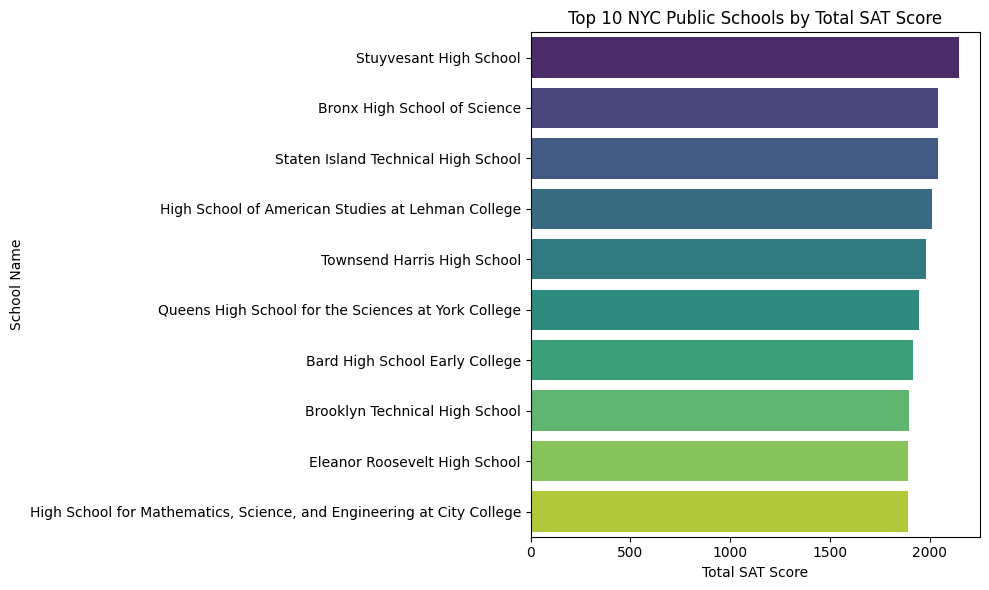

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_10_schools,
    x="total_SAT",
    y="school_name",
    hue = "school_name",
    palette="viridis"
)

plt.title("Top 10 NYC Public Schools by Total SAT Score")
plt.xlabel("Total SAT Score")
plt.ylabel("School Name")
plt.tight_layout()
plt.show()

Based on the results,

**Which single borough has the largest standard deviation in the combined SAT score?**

- Save your results as a pandas DataFrame called largest_std_dev.
- The DataFrame should contain one row, with:
  "borough" - the name of the NYC borough with the largest standard deviation of "total_SAT".
  "num_schools" - the number of schools in the borough.
  "average_SAT" - the mean of "total_SAT".
  "std_SAT" - the standard deviation of "total_SAT".
- Round all numeric values to two decimal places.

In [60]:
#Grouping the data by borough
borough_NYC = schools.groupby('borough')['total_SAT'].agg(['count','mean', 'std']).round(2)

#Filtering for the largest standard deviation
largest_std_dev = borough_NYC[borough_NYC['std'] == borough_NYC['std'].max()]

#Rename columns
largest_std_dev = largest_std_dev.rename(columns = {'count' : 'num_schools', 'mean' : 'average_SAT', 'std' : 'std_SAT'})

largest_std_dev.reset_index(inplace = True)
print(largest_std_dev)


     borough  num_schools  average_SAT  std_SAT
0  Manhattan           89      1340.13   230.29


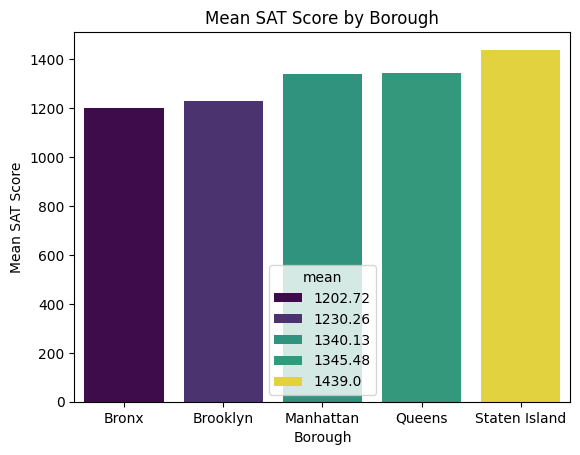

In [68]:
# Visualization SAT Score Comparison by School
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = 'borough',
            y = 'mean',
            data = borough_NYC.reset_index(),
            hue = 'mean',
            palette='viridis')

plt.title('Mean SAT Score by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean SAT Score')
plt.show()